### IMPORT NECESSARY FILES

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import joblib

### Load and Analyze the Data

In [67]:
# Load Data
df = pd.read_csv('Dataset01-Employee_Attrition.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [68]:
df.shape

(14999, 10)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [70]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [71]:
df.Work_accident.value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [72]:

df['left'].value_counts()


left
0    11428
1     3571
Name: count, dtype: int64

In [73]:
df.duplicated().sum()

3008

### Droping The Duplicate Coloumn

In [74]:
df.drop_duplicates(inplace=True)

### One Hot Encoding

In [75]:
# One-hot encode categorical features
df = pd.concat([
    df.drop(columns=["Department", "salary"]),
    pd.get_dummies(df["Department"], prefix="Department", dtype=int),
    pd.get_dummies(df["salary"], prefix="Salary", dtype=int)
], axis=1)


In [76]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,Salary_high,Salary_low,Salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Analyzing the Data with graphs

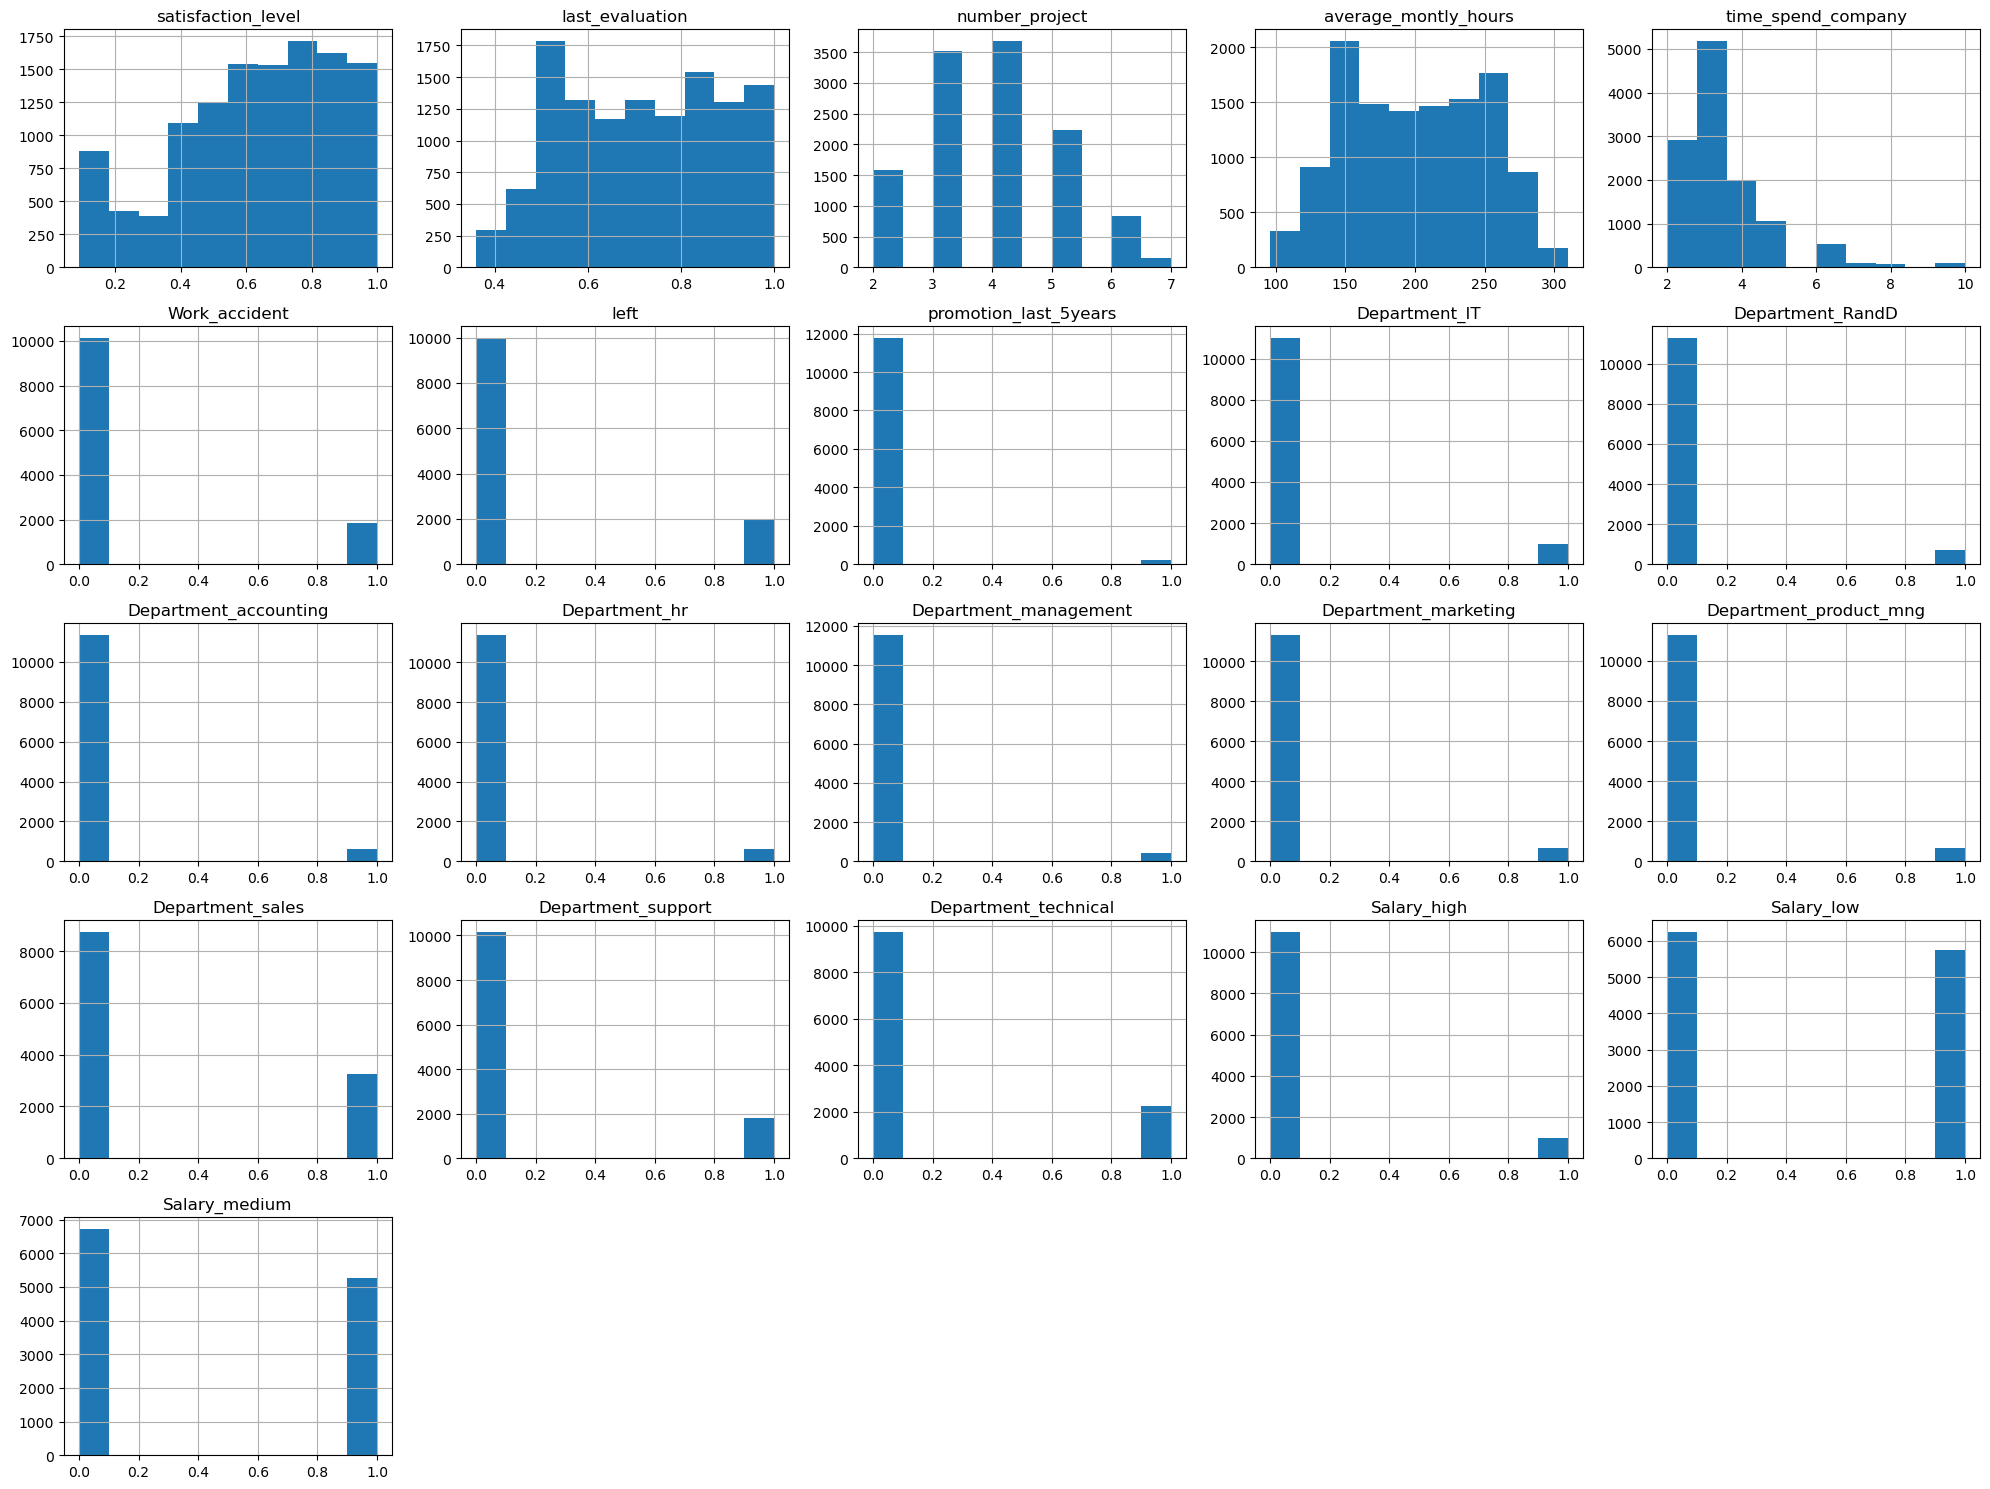

In [77]:
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [78]:
# Define features and target
X = df.drop("left", axis=1)
y = df["left"]

### Traning And Testing the Data

In [79]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE(Synthetic Minority Over-sampling Technique) - For  imbalance data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


### Appling GridSearchCV - For Best Hyperparameters

In [80]:

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=classifier,
                            param_grid=param_grid,
                            cv=5, 
                            scoring='f1',
                            n_jobs=-1, 
                            verbose=1)

grid_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1)}

In [ ]:
best_model = grid_search.best_estimator_

print("Best Parameters Found:\n", grid_search.best_params_)

Best Parameters Found:
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Predict Probabilities & Apply Threshold

In [ ]:
# To control Recall vs Precision
y_probs = best_model.predict_proba(X_test)[:, 1]
threshold = 0.5  # Reduce to increase recall
y_pred_custom = (y_probs >= threshold).astype(int)


### Evaluation

In [ ]:

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_custom, digits=2))



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1998
           1       0.95      0.89      0.92       401

    accuracy                           0.97      2399
   macro avg       0.96      0.94      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [ ]:

cm = confusion_matrix(y_test, y_pred_custom)
acc = accuracy_score(y_test, y_pred_custom)
prec = precision_score(y_test, y_pred_custom)
rec = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print("\n=== Evaluation Metrics ===")
print(f"Accuracy Score   : {acc * 100:.2f}%")
print(f"Precision Score  : {prec * 100:.2f}%")
print(f"Recall Score     : {rec * 100:.2f}%")
print(f"F1 Score         : {f1 * 100:.2f}%")


=== Evaluation Metrics ===
Accuracy Score   : 97.37%
Precision Score  : 95.19%
Recall Score     : 88.78%
F1 Score         : 91.87%


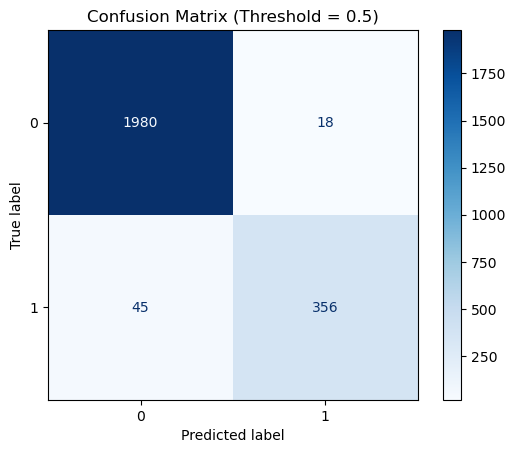

In [ ]:

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_custom, cmap="Blues")
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.show()

/var/folders/dw/7k0hkwcn7rs6c_t7gr9plqvh0000gp/T/ipykernel_57111/2837305282.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette="viridis")


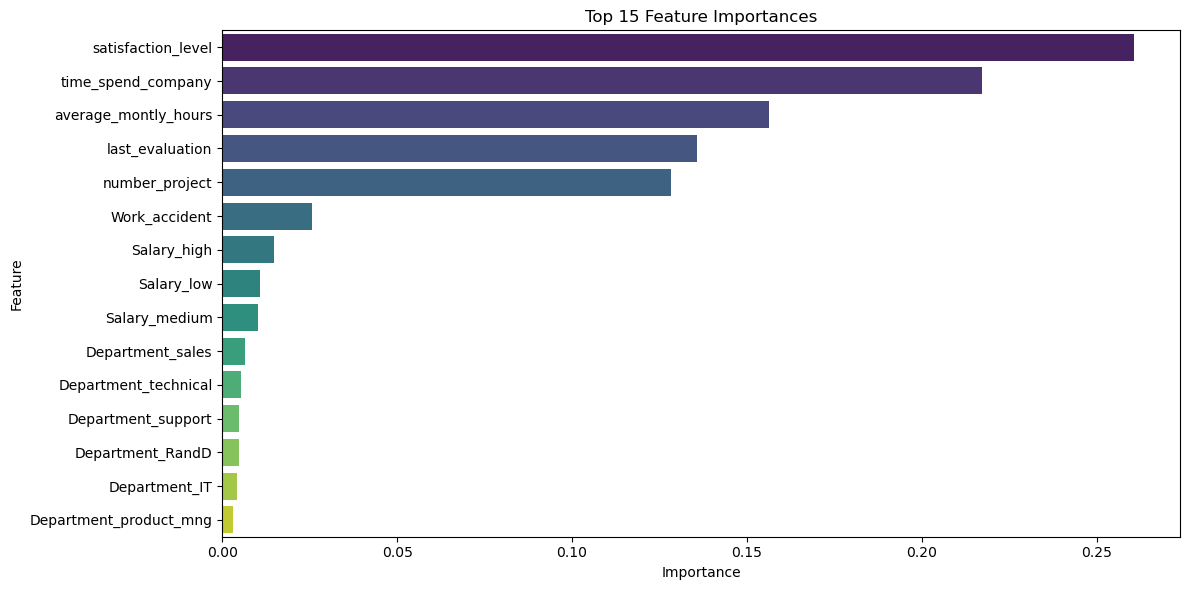

In [ ]:
# Feature Importance
importances = best_model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette="viridis")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

### Save Model and Columns

In [ ]:
# Save Model and Columns
joblib.dump(best_model, "final_model.joblib")
joblib.dump(list(X.columns), "feature_list.joblib")


['feature_list.joblib']

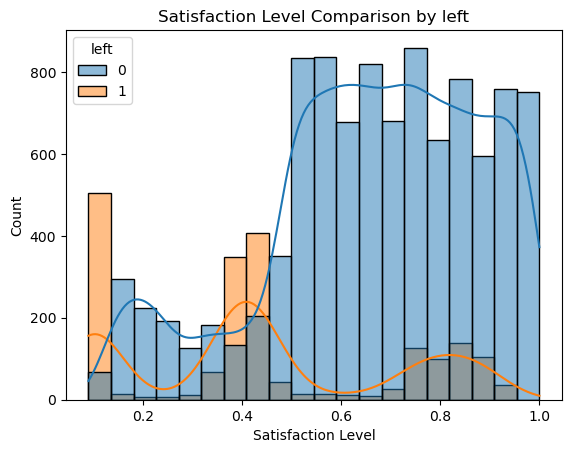

In [ ]:
sns.histplot(data=df, x='satisfaction_level', hue='left', bins=20, kde=True)
plt.title("Satisfaction Level Comparison by left")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()